1. 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv("netflix_reviews.csv")
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


2. 결측치 처리

In [2]:
df['content'].isnull().sum()

2

In [3]:
df['content']=df['content'].fillna('')

3. 텍스트 데이터 전처리

In [4]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

processed=df['content'].apply(simple_preprocess)
processed

0         [great, app, on, the, move, can, watch, my, mo...
1                                                    [good]
2         [need, to, improve, and, to, update, some, err...
3         [netflix, is, nice, app, but, not, all, the, m...
4         [not, much, availability, considering, options...
                                ...                        
117129    [really, like, it, there, are, so, many, movie...
117130    [love, netflix, always, enjoy, my, time, using...
117131         [sound, quality, is, very, slow, of, movies]
117132    [rate, is, very, expensive, bcos, we, see, net...
117133    [this, app, is, awesome, for, english, movies,...
Name: content, Length: 117134, dtype: object

3-2. 텍스트 데이터 표제어 추출

In [36]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer=WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatized = processed.apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) 
                                        for word, tag in nltk.pos_tag(x)])
lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hispa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\hispa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


0         [great, app, on, the, move, can, watch, my, mo...
1                                                    [good]
2         [need, to, improve, and, to, update, some, err...
3         [netflix, be, nice, app, but, not, all, the, m...
4         [not, much, availability, consider, option, on...
                                ...                        
117129    [really, like, it, there, be, so, many, movie,...
117130    [love, netflix, always, enjoy, my, time, use, it]
117131          [sound, quality, be, very, slow, of, movie]
117132    [rate, be, very, expensive, bcos, we, see, net...
117133    [this, app, be, awesome, for, english, movie, ...
Name: content, Length: 117134, dtype: object

3-3. textblob에 넘겨주기 위한 문장 처리

In [40]:
df['content_c']=lemmatized.apply(lambda x: ' '.join(x))
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c,sentiment,sentiment_label
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908,great app on the move can watch my movie and s...,0.800000,positive
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN,good,0.700000,positive
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829,need to improve and to update some error durin...,0.000000,neutral
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908,netflix be nice app but not all the movie be t...,-0.066667,neutral
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908,not much availability consider option on what ...,-0.100000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN,really like it there be so many movie and kdra...,0.350000,positive
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250,love netflix always enjoy my time use it,0.450000,positive
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN,sound quality be very slow of movie,0.005000,neutral
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346,rate be very expensive bcos we see netflix sun...,-0.325000,negative


3-4. 텍스트 데이터 감정 분석 처리

In [42]:
# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
    
df['sentiment']=df['content_c'].apply(get_sentiment)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c,sentiment,sentiment_label
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908,great app on the move can watch my movie and s...,0.800,positive
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN,good,0.700,positive
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829,need to improve and to update some error durin...,0.000,neutral
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908,netflix be nice app but not all the movie be t...,0.300,neutral
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908,not much availability consider option on what ...,-0.100,neutral
...,...,...,...,...,...,...,...,...,...,...,...
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN,really like it there be so many movie and kdra...,0.350,positive
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250,love netflix always enjoy my time use it,0.450,positive
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN,sound quality be very slow of movie,0.005,neutral
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346,rate be very expensive bcos we see netflix sun...,-0.325,negative


3-5. 감정 분류 기준 적용

In [9]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content_c', 'score', 'sentiment_label']]

,content_c,score,sentiment_label
0,great app on the move can watch my movie and s...,5,positive
1,good,5,positive
2,need to improve and to update some error durin...,3,neutral
3,netflix is nice app but not all the movie are ...,3,neutral
4,not much availability considering option on wh...,3,neutral
...,...,...,...
117129,really like it there are so many movie and kdr...,5,positive
117130,love netflix always enjoy my time using it,5,positive
117131,sound quality is very slow of movie,1,neutral
117132,rate is very expensive bcos we see netflix sun...,1,negative


4. 데이터 시각화를 위한 라이브러리 import

In [43]:
import matplotlib.pyplot as plt

In [44]:
negative_content = df[df['sentiment_label'] == 'negative']['content_c']
negative_content

5                                         this not good app
7         netflix app not work on my mobile get pop up s...
12        don watch if you have photosensitive seizure t...
13        what hate about netflix you can login without ...
24        app glitch when watch garbage app waste of sub...
                                ...                        
117095    it win let me sign in so not good time because...
117106    add the other beyblade show like evolution qua...
117109    this platform keep get bad and bad inclusivity...
117128    everytime watch show it go so dark so can watc...
117132    rate be very expensive bcos we see netflix sun...
Name: content_c, Length: 19870, dtype: object

5-1. 부정적인 리뷰 가운데 핵심 단어만 뽑아 시각화

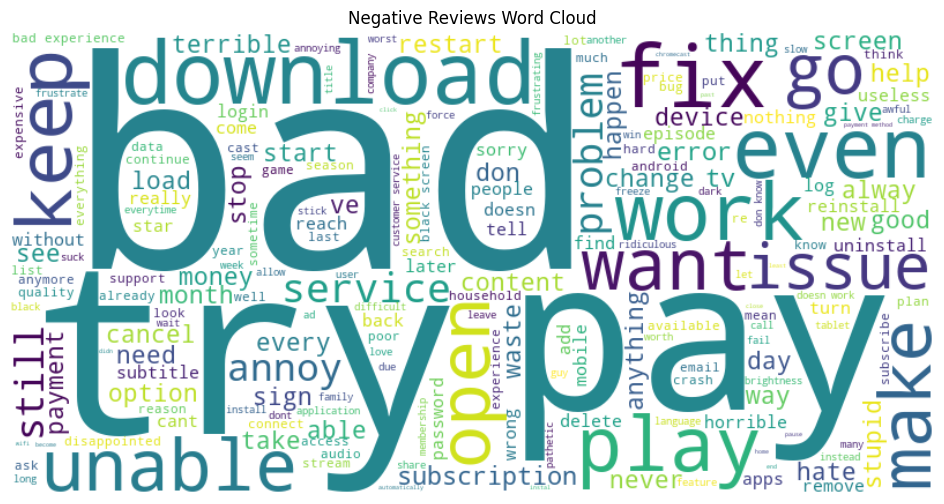

In [48]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['use', 'account', 'now', 'netflix', 'movie', 'show', 'time', 'app', 'series', 'phone', 'movies', 'watch', 'shows', 'update', 'video', 'say', 'one', 'please', 'will', 'im'])  # 리뷰에서 필요없는 단어는 여기 안에 추가하셔도 좋습니다.

negative_content = df[df['sentiment_label'] == 'negative']['content_c']
negative_reviews=" ".join(content for content in negative_content)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

5-2. 중립적인 리뷰 가운데 핵심 단어만 뽑아 시각화

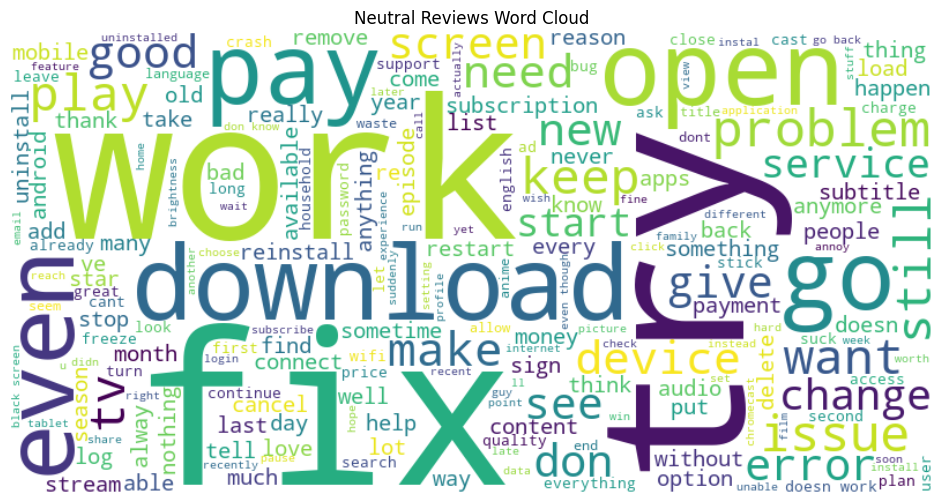

In [50]:
neutral_content = df[df['sentiment_label'] == 'neutral']['content_c']
neutral_reviews=" ".join(content for content in neutral_content)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(neutral_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Word Cloud')
plt.show()

5-3. 긍정적인 리뷰 가운데 핵심 단어만 뽑아 시각화

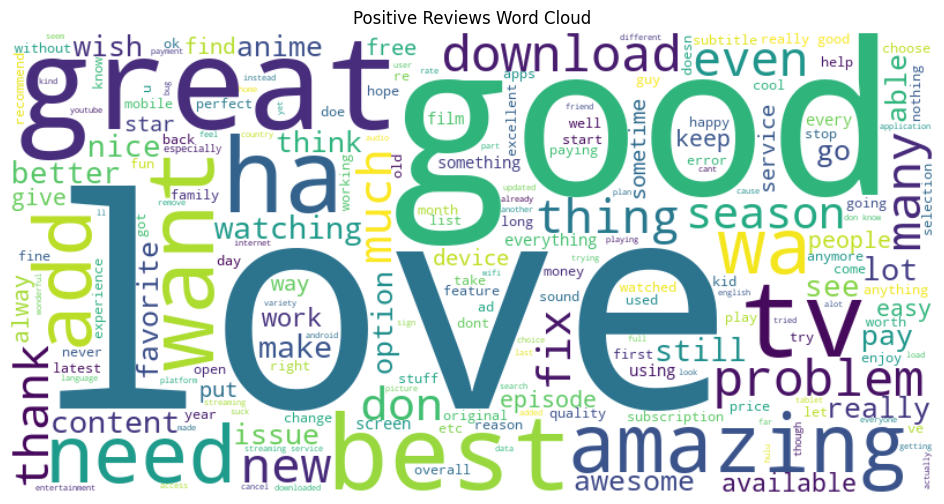

In [14]:
positive_content = df[df['sentiment_label'] == 'positive']['content_c']
positive_reviews=" ".join(content for content in positive_content)

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()